In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import nan
from scribe_classifier.data.scribe import DataFramePickler, DbHandler
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


In [2]:
# user = "mgooch"
# pwd = "60gxnhCRvvvexwRQeHHw"
# dbstr = "localhost/scribe"
# dbh = DbHandler(dbstr, user, pwd)
# df = dbh.grab_usa_medium_tech_data()
# print(df.columns)
# relevant_df = df.filter(['company', 'industry', 'companyCity', 'companyCountry', 'employeeCount'], axis=1)
# for col in relevant_df.columns:
#     if col == 'employeeCount':
#         relevant_df[col].fillna(value=nan, inplace=True)
#     else:
#         relevant_df[col].fillna(value="", inplace=True)
# print(relevant_df.shape)
df = DataFramePickler.load_from_pickle('./SavedScribeQueries/midsize_tech_usa.P')
# print(df.columns)
df=df.drop(['email', 'firstName', 'lastName', 'emailError', 'emailvalidity'], axis=1)
df

,id,company,industry,title,companyCity,companyCountry,employeeCount
0,19737,BrightTALK,marketing and advertising,Animator,San Francisco,United States,240
1,22861,Acuity Business Solutions - a division of Stam...,computer software,Marketing and Communications Coordinator,East York,United States,21
2,23658,"Brisbane Consulting Group, LLC - Nonprofit Sol...",computer software,Director of Nonprofit Technology Solutions,Buffalo,United States,2
3,25675,Southside Creative Group,marketing and advertising,Partner,Chattanooga,United States,10
4,33400,Winshuttle,computer software,Senior Sharepoint Consultant,Bothell,United States,380
5,47452,Fuseideas,marketing and advertising,Controller,Winchester,United States,63
6,50016,BARKER Advertising,marketing and advertising,Financial Controller,New York,United States,45
7,52140,Thinknum,internet,Co-founder,New York,United States,6
8,53981,Deltek,computer software,Principal Consultant,Herndon,United States,23
9,58793,MJM Innovations,computer software,Accounting Manager,Baltimore,United States,28


In [12]:
# title_plot = sns.countplot(data=df,x='title')

In [33]:
titles = df['title'].value_counts()
# print(titles)
# titles=titles.to_dict()

In [34]:
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()

In [76]:
tdf = pd.DataFrame(titles)
# tdf[] = 'title_count'
# title_l = []
# title_c = []
# for title in titles:
#     title_l.append(title)
#     title_c.append(titles[title])
# tdf['titles']=title_l
# tdf['title_count']=title_c
# tdf.withColumn("rowId", monotonically_increasing_id()) 
# tdf

ids = []
for i in range(len(tdf)):
    ids.append(i+1)
# print(len(ids))
tdf['ids']=ids
tdf.columns

Index(['title', 'ids'], dtype='object')

In [86]:
def scatplot(df):
    # Set style of scatterplot
    sns.set_context("notebook", font_scale=1.1)
    sns.set_style("ticks")

    # fig, ax = plt.subplots()
    # fig.set_size_inches(14, 9)

    # Create scatterplot of dataframe
    sns.lmplot('ids', # Horizontal axis
               'title', # Vertical axis
               data=df, # Data source
               fit_reg=False, # Don't fix a regression line
               scatter_kws={"marker": "D", # Set marker style
                            "s": 100},
              size=9, aspect=14.0/9.0) # S marker size

    # Set title
    plt.title('Frequency of Job Titles in Subset')

    # Set x-axis label
    plt.xlabel('Unique Job Title Text')

    # Set y-axis label
    plt.ylabel('# of Appearances')
    
def log_log_scatplot(df):
    # Set style of scatterplot
    sns.set_context("notebook", font_scale=1.1)
    sns.set_style("ticks")

    fig, ax = plt.subplots()
    fig.set_size_inches(14, 9)
    ax.set(xscale='log', yscale='log')

    # Create scatterplot of dataframe
    sns.regplot('ids', # Horizontal axis
               'title', # Vertical axis
               data=df, # Data source
               fit_reg=False, # Don't fix a regression line
               scatter_kws={"marker": "D", # Set marker style
                            "s": 100}, ax=ax) # S marker size

    # Set title
    plt.title('Frequency of Job Titles in Subset')

    # Set x-axis label
    plt.xlabel('Unique Job Title Text')

    # Set y-axis label
    plt.ylabel('# of Appearances')



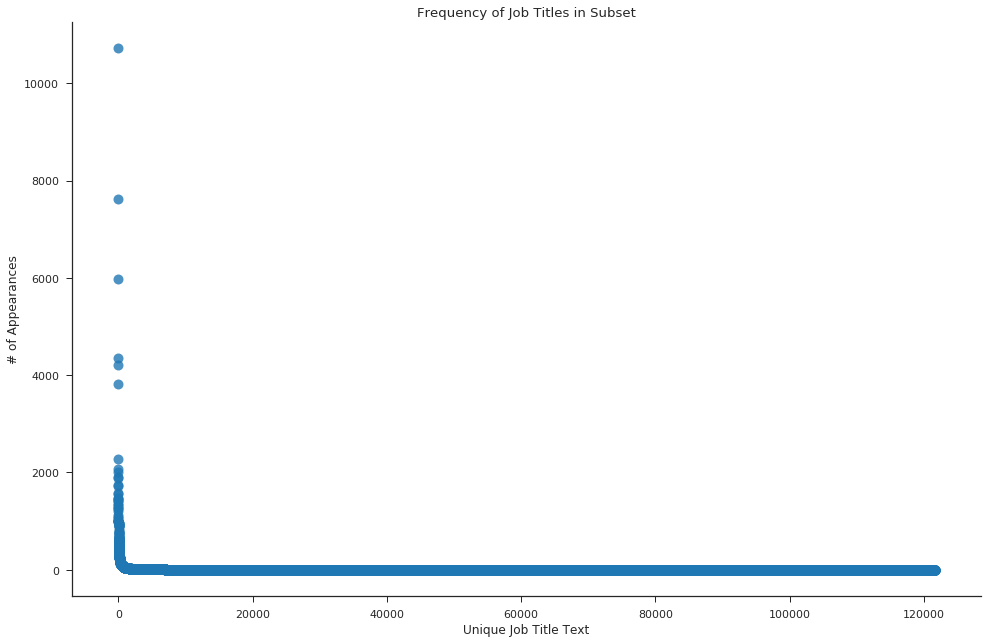

In [80]:
scatplot(tdf)

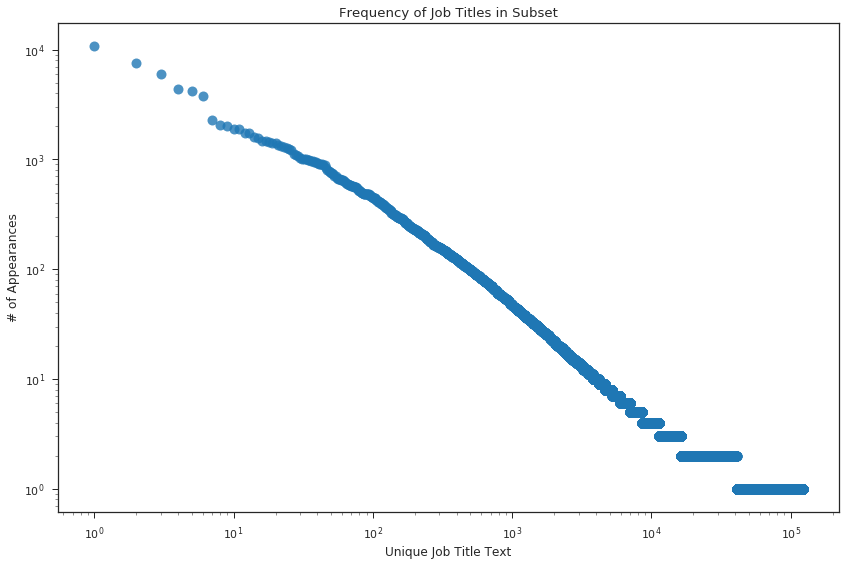

In [87]:
log_log_scatplot(tdf)

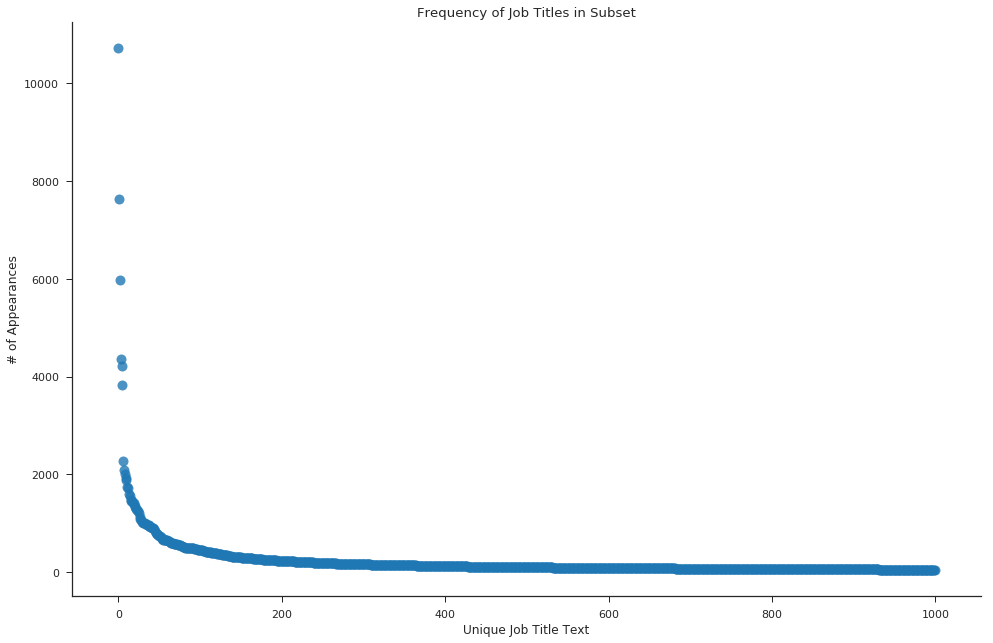

In [63]:
scatplot(tdf[0:1000])

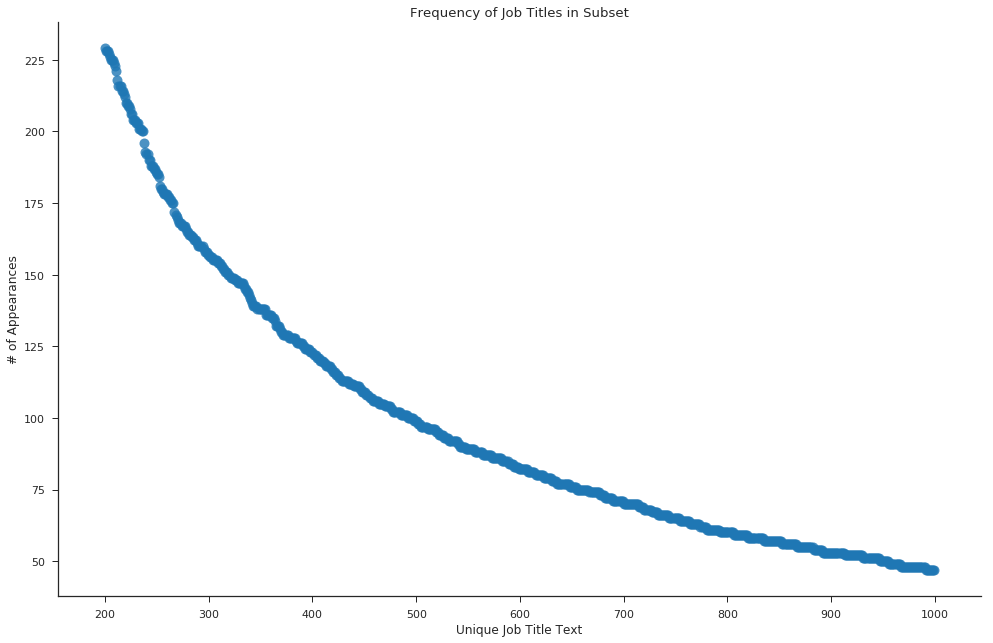

In [64]:
scatplot(tdf[200:1000])

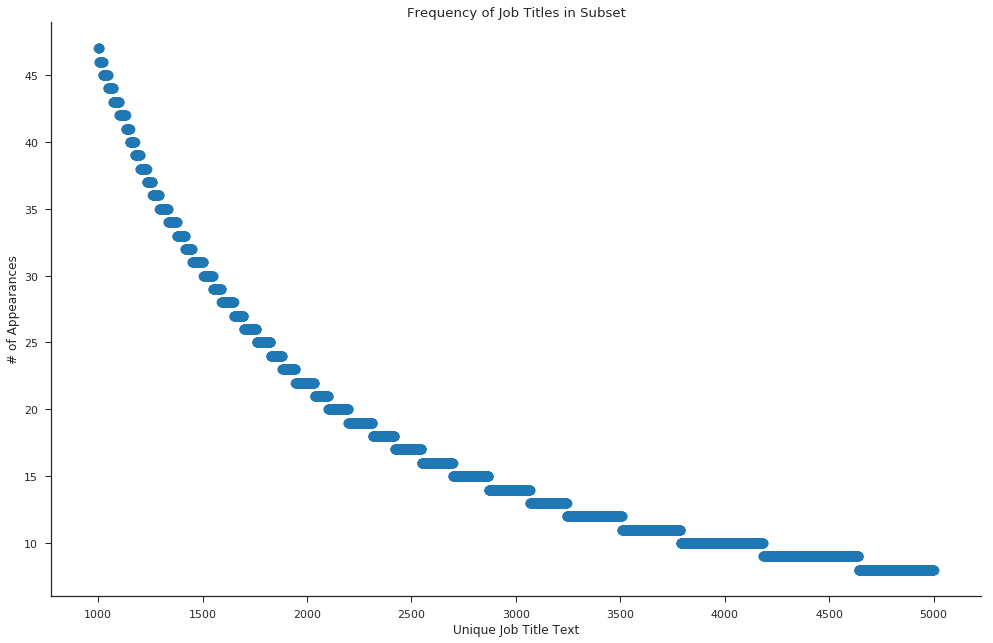

In [104]:
scatplot(tdf[1000:5000]) #5236

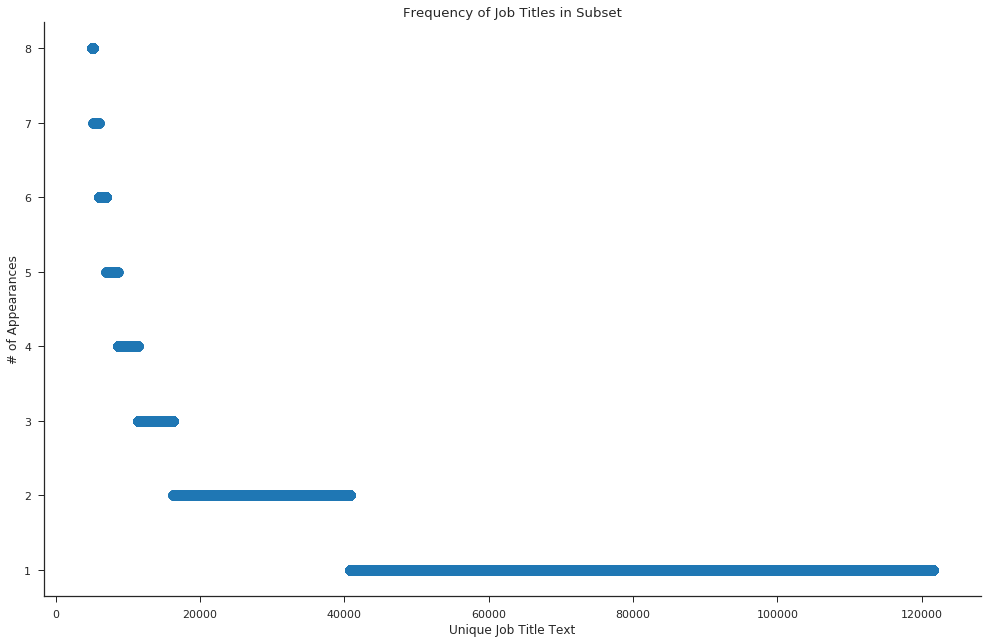

In [105]:
scatplot(tdf[5000:]) #5237

In [106]:
tdf

,title,ids
Software Engineer,10716,1
Account Executive,7624,2
Account Manager,5985,3
Project Manager,4354,4
Senior Software Engineer,4218,5
Software Developer,3824,6
Owner,2267,7
Product Manager,2079,8
Graphic Designer,2001,9
CEO,1914,10


AttributeError: 'NoneType' object has no attribute 'lower'